In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [29]:
df=pd.read_csv("D:/Machine Learning/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,3,NaN,little,1169,6,radio/TV
1,1,22,female,2,3,little,moderate,5951,48,radio/TV
2,2,49,male,1,3,little,NaN,2096,12,education
3,3,45,male,2,2,little,little,7882,42,furniture/equipment
4,4,53,male,2,2,little,little,4870,24,car


In [31]:
df.shape

(1000, 10)

In [33]:
df=df.drop('Unnamed: 0',axis='columns')

In [35]:
df['Saving accounts'].fillna('no_info',inplace=True)
df['Checking account'].fillna('no_info',inplace=True)
df.head()

C:\Users\sumai\AppData\Local\Temp\ipykernel_20940\3032603329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('no_info',inplace=True)
C:\Users\sumai\AppData\Local\Temp\ipykernel_20940\3032603329.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,3,no_info,little,1169,6,radio/TV
1,22,female,2,3,little,moderate,5951,48,radio/TV
2,49,male,1,3,little,no_info,2096,12,education
3,45,male,2,2,little,little,7882,42,furniture/equipment
4,53,male,2,2,little,little,4870,24,car


In [37]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,3,no_info,little,1169,6,radio/TV
1,22,0,2,3,little,moderate,5951,48,radio/TV
2,49,1,1,3,little,no_info,2096,12,education
3,45,1,2,2,little,little,7882,42,furniture/equipment
4,53,1,2,2,little,little,4870,24,car


In [41]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
no_info       183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [43]:
df=pd.get_dummies(df, columns=['Housing','Saving accounts','Checking account','Purpose'],drop_first=True)

In [209]:
df['Target']=(df['Credit amount']>2000).astype(int) 
df['Target'].value_counts()

Target
1    568
0    432
Name: count, dtype: int64

In [211]:
df.head()

,Age,Sex,Job,Credit amount,Duration,Housing_2,Housing_3,Saving accounts_moderate,Saving accounts_no_info,Saving accounts_quite rich,...,Checking account_no_info,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Target
0,67,1,2,1169,6,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,0
1,22,0,2,5951,48,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,1
2,49,1,1,2096,12,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,1
3,45,1,2,7882,42,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
4,53,1,2,4870,24,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1


In [213]:
X=df.drop(['Credit amount','Target'],axis='columns')
y=df.Target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [215]:
numerical_cols=df.drop('Target',axis=1).columns.tolist()

## Implementing Logistic Regression

In [217]:
clf=Pipeline([
    ('sc',StandardScaler()),
    ('lr',LogisticRegression(max_iter=1000))  
])

In [219]:
clf.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000))])

In [221]:
y_pred=clf.predict(X_test)

In [223]:
clf.predict(X_test.iloc[[2]])

array([1])

In [225]:
y_test.iloc[2]

1

In [227]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        91
           1       0.80      0.77      0.79       109

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



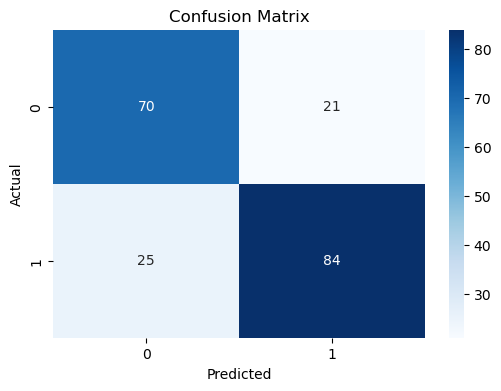

In [229]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [231]:
y_prob=clf.predict_proba(X_test)[:,1]

In [233]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=roc_auc_score(y_test,y_prob)

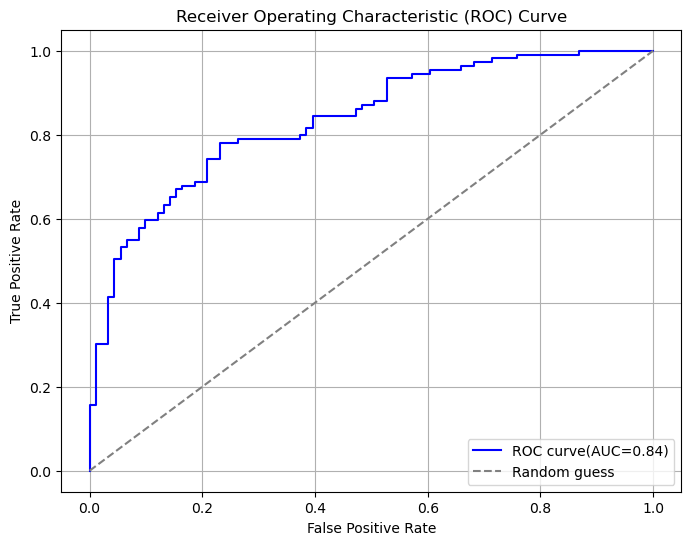

In [235]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0, 1],[0, 1],color='grey',linestyle='--',label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Implementing Decision Tree

In [267]:
clf=Pipeline([
    ('sc',StandardScaler()),
    ('dc',DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10))  
])
clf.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('dc',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                        min_samples_split=20))])

In [269]:
clf.predict(X_test.iloc[[2]])

array([1])

In [271]:
y_test.iloc[2]

1

In [273]:
y_pred=clf.predict(X_test)

In [275]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70        91
           1       0.76      0.69      0.72       109

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



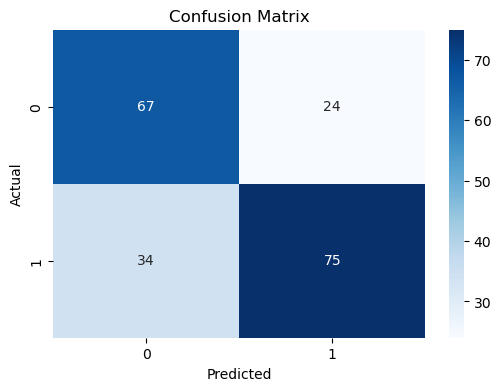

In [277]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

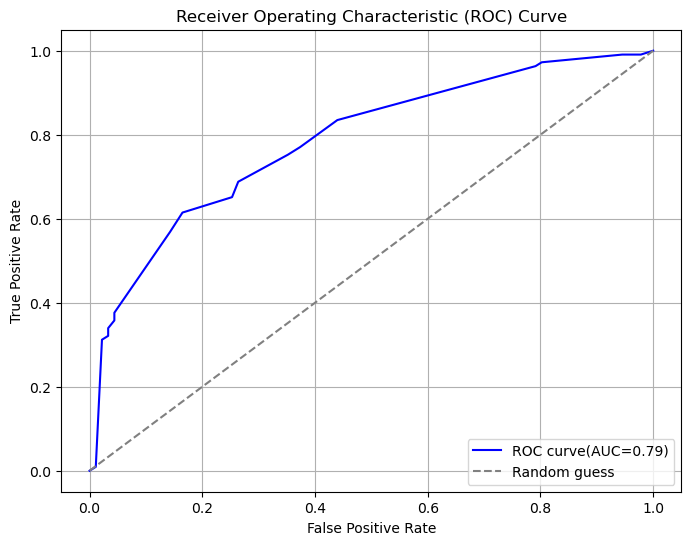

In [279]:
y_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=roc_auc_score(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0, 1],[0, 1],color='grey',linestyle='--',label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Implementing Random Forest

In [281]:
clf=Pipeline([
    ('sc',StandardScaler()),
    ('rf',RandomForestClassifier(n_estimators=100,
    max_depth=5,                
    min_samples_split=10,       
    min_samples_leaf=5,         
    random_state=42))  
])
clf.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

In [283]:
clf.predict(X_test.iloc[[2]])

array([1])

In [285]:
y_test.iloc[2]

1

In [287]:
y_pred=clf.predict(X_test)

In [289]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        91
           1       0.76      0.74      0.75       109

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.74       200



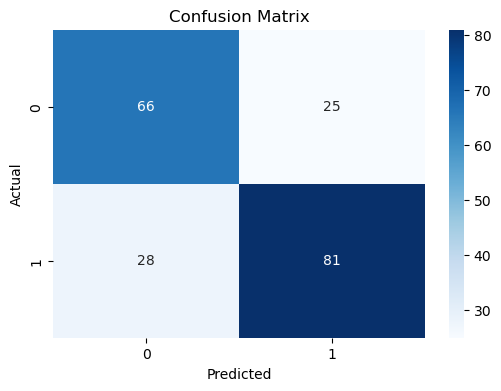

In [291]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

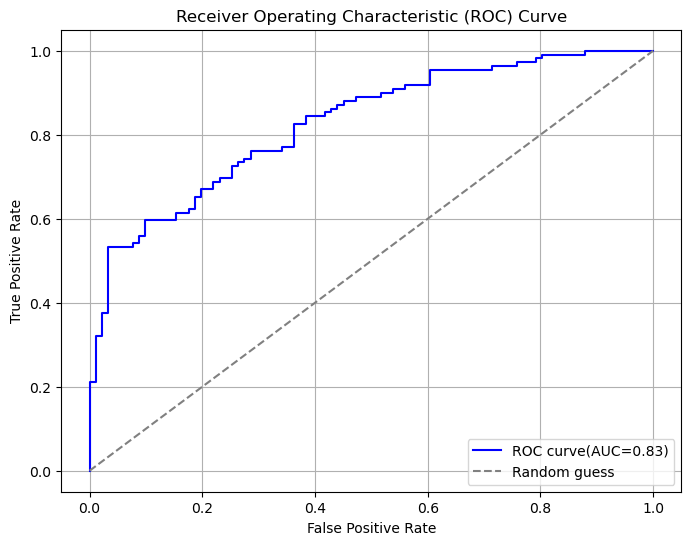

In [265]:
y_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=roc_auc_score(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0, 1],[0, 1],color='grey',linestyle='--',label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Among the models evaluated, Logistic Regression performed best after removing the Credit amount feature, achieving the highest accuracy and a balanced ROC AUC. While tree-based models like Decision Tree and Random Forest are powerful, they showed signs of overfitting or did not significantly outperform logistic regression, making the simpler model a better choice here.